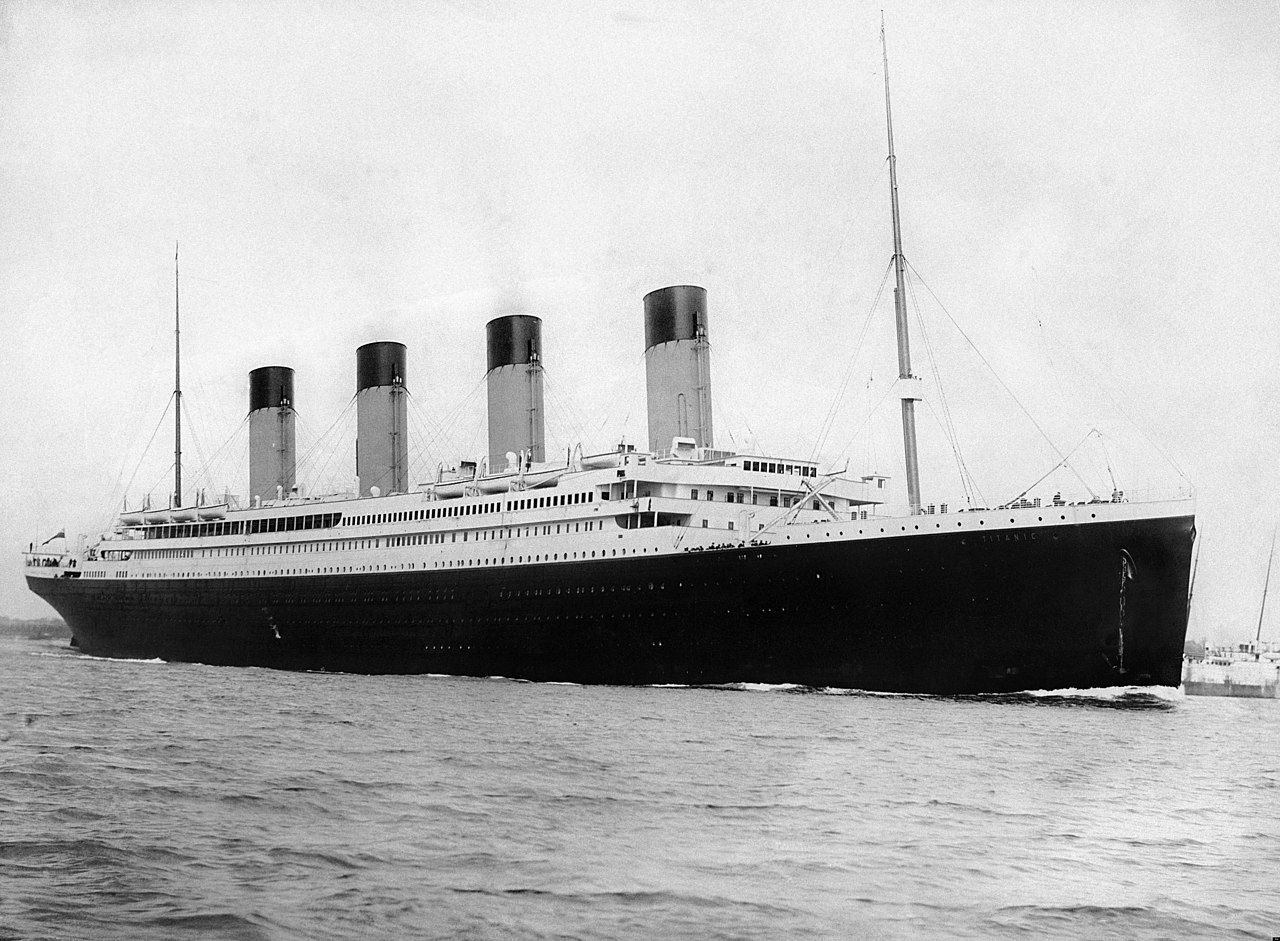

RMS Titanic adalah sebuah kapal penumpang super Britania Raya yang tenggelam di Samudra Atlantik Utara pada tanggal 15 April 1912 setelah menabrak sebuah gunung es pada pelayaran perdananya dari Southampton, Inggris ke New York City. Tenggelamnya Titanic mengakibatkan kematian sebanyak 1514 orang dalam salah satu bencana maritim masa dama paling mematikan sepanjang sejarah. Titanic merupakan kapal terbesar di dunia pada pelayaran perdananya. Satu dari tiga kapal samudra kelas Olympic dioperasikan oleh White Star Line. Kapal ini dibangun pada 1909 sampai 1911 oleh galangan kapal Harland and Wolff di Belfast. Kapal ini sanggup mengangkut 2,224 penumpang.





Pada kali ini saya akan mencoba menganalisis data titanic dengan workflow:


1.   Exploratory Data Analysis (EDA)
1.   Preprocessing Data
2.   Modelling

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

Penjelasan fitur-fitur yang ada pada data titanic



1.   PassengerId = Id Penumpang

1.   Survived = 0 : No (Meninggal), 1 : Yes (Hidup)

1.   pcalss = Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
2.   Name = Nama dari setiap penumpang

5.   Sex = Jenis kelamin setiap penumpang

6.   Age = Umur setiap penumpang

1.   Fare = Tarif atau harga tiket
2.   Sibsp / siblings = Jumlah saudara atau pasangan

1.   Parch = Jumlah orang tua atau anak
2.   Ticket = nomor tiket

1.   Cabin = Nomor kamar di kapal
2.   Embarked = Pelabuhan pemberangkatan ( C = Cherbourg, Q = Queenstown, S = Southampton )









In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
# Melihat 5 data awal train

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Melihat 5 data awal test

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Melihat ukuran dataset train dan test

print("Ukuran data train adalah ",train.shape)
print("Ukuran data test adalah ",test.shape)

Ukuran data train adalah  (891, 12)
Ukuran data test adalah  (418, 11)


In [ ]:
# Melihat informasi pada data

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Dari informasi diatas diperolah informasi yaitu:


*   Fitur Age, Cabin, dan embarked memiliki missing value
*   Memiliki total 12 kolom

*   Memiliki 2 fitur yang bertipe data float, 5 fitur bertipe data integer, dan 5 fitur yang bertipe data objek atau kategorikal






In [ ]:
# Mengecek missing value

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Terdapat 177 missing value pada fitur Age, 687 pada fitur Cabin dan 2 pada fitur Embarked

In [ ]:
# Melihat statistik sederhana dari dataset

train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Visualisasi Data

## Perbandingan Jumlah Penumpang Pria dan Wanita

In [ ]:
count_sex = train["Sex"].value_counts()

index_sex = count_sex.index
values_sex = count_sex.values

Text(0.5, 1.0, 'Perbandingan Jumlah Penumpang Pria dan Wanita')

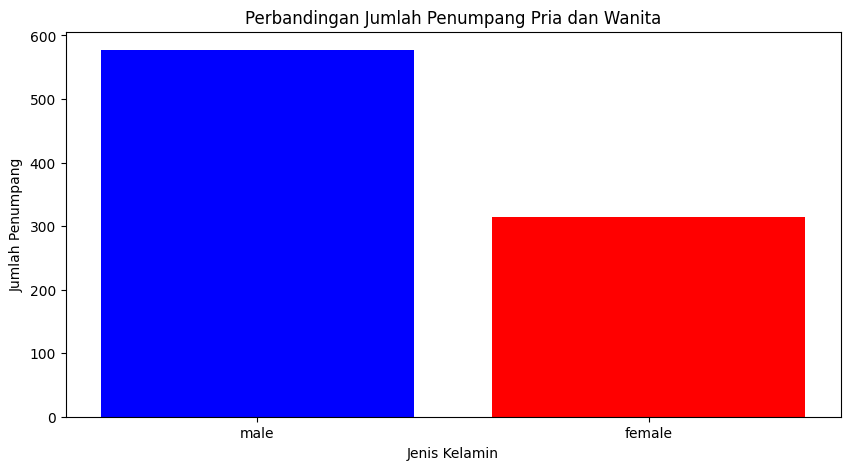

In [ ]:
plt.figure(figsize = (10,5))
plt.bar(index_sex, values_sex, color=['blue', 'red'])
plt.xlabel("Jenis Kelamin")
plt.ylabel("Jumlah Penumpang")
plt.title("Perbandingan Jumlah Penumpang Pria dan Wanita")

Dari hasil visualisasi diatas menunjukkan lebih banyak penumpang berjenis kelamin pria dibandingkan dengan wanita

## Perbandingan Jumlah Antar Kelas Tiket

Text(0.5, 1.0, 'Perbandingan Jumlah Antar Kelas Tiket')

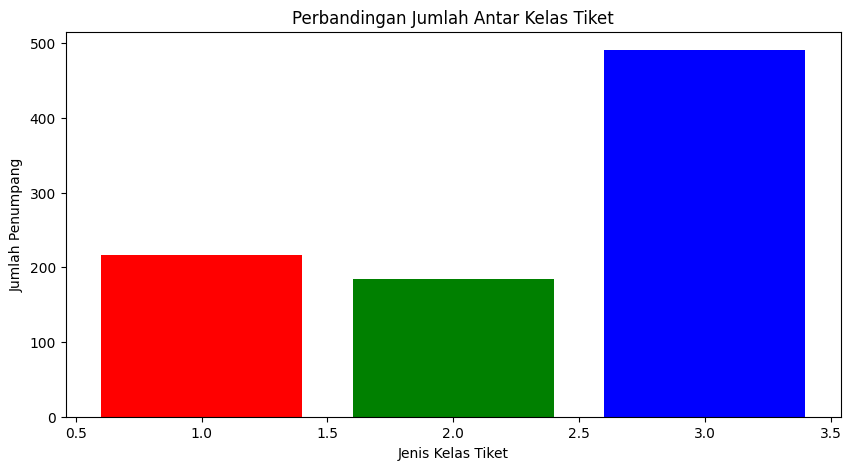

In [ ]:
count_pclass = train["Pclass"].value_counts()

index_pclass = count_pclass.index
values_pclass = count_pclass.values

plt.figure(figsize = (10,5))
plt.bar(index_pclass, values_pclass, color=['blue', 'red', 'green'])
plt.xlabel("Jenis Kelas Tiket")
plt.ylabel("Jumlah Penumpang")
plt.title("Perbandingan Jumlah Antar Kelas Tiket")

Ternyata penumpang kapal titanic lebih banyak memesan  kelas tiket 3 atau 3rd

## Perbandingan Jumlah Banyaknya Saudara atau Pasangan

Text(0.5, 1.0, 'Perbandingan Jumlah Saudara atau Pasangan yang Ikut')

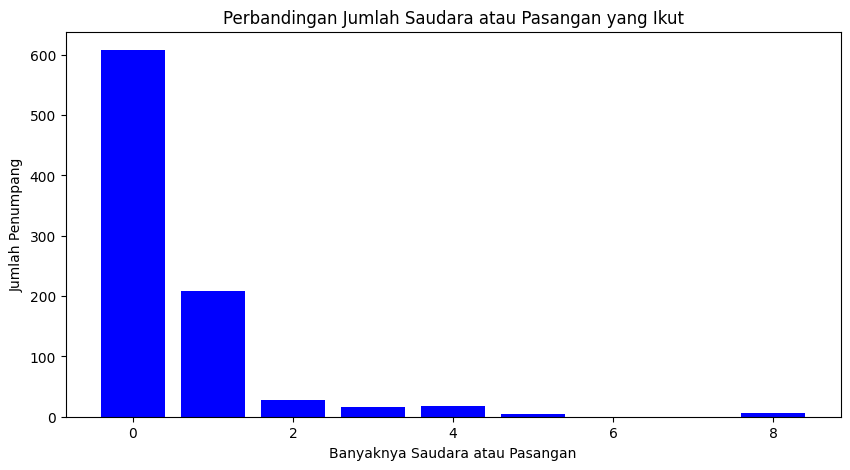

In [ ]:
count_sibsp	= train["SibSp"].value_counts()

index_sibsp = count_sibsp.index
values_sibsp = count_sibsp.values

plt.figure(figsize = (10,5))
plt.bar(index_sibsp, values_sibsp, color = 'blue')
plt.xlabel("Banyaknya Saudara atau Pasangan")
plt.ylabel("Jumlah Penumpang")
plt.title("Perbandingan Jumlah Saudara atau Pasangan yang Ikut")

Ternyata kebanyakan penumpang kapal titanic berangkat sendiri tanpa adanya saudara atau pasangan yang ikut

## Perbandingan Penumpang Selamat Berdasarkan Jenis Kelamin

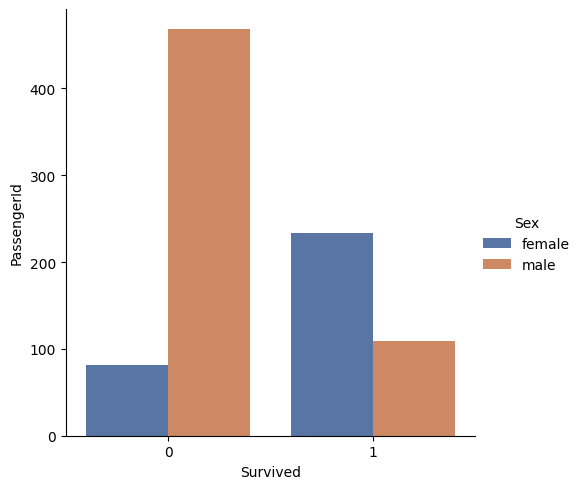

In [ ]:
survived = train.groupby(['Survived','Sex']).count()['PassengerId'].reset_index()

sns.catplot(data = survived, x = 'Survived', y = 'PassengerId', kind = 'bar', hue = 'Sex', palette = 'deep')

Visualisasi diatas menunjukkan bahwa penumpang yang selamat lebih banyak wanita. Kemungkinan alasan penumpang selamat lebih banyak wanita adalah ketika kapal tenggelam, saat evakuasi kemungkinan didahulukan wanita terlebih dahulu untuk naik kapal atau sekoci evakuasi

## Melihat perbandingan Banyaknya Penumpang Kapal Titanic Berdasarkan Umur

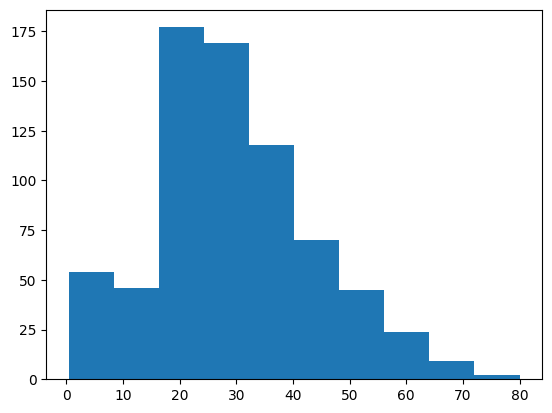

In [ ]:
plt.hist(train['Age'])
plt.show()

Histogram diatas menunjukkan bahwa kebanyakan penumpang kapal titanic sekitar berumur 18 - 33 tahun.

## Melihat Peluang Penumpang Selamat Berdasarkan Umur

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


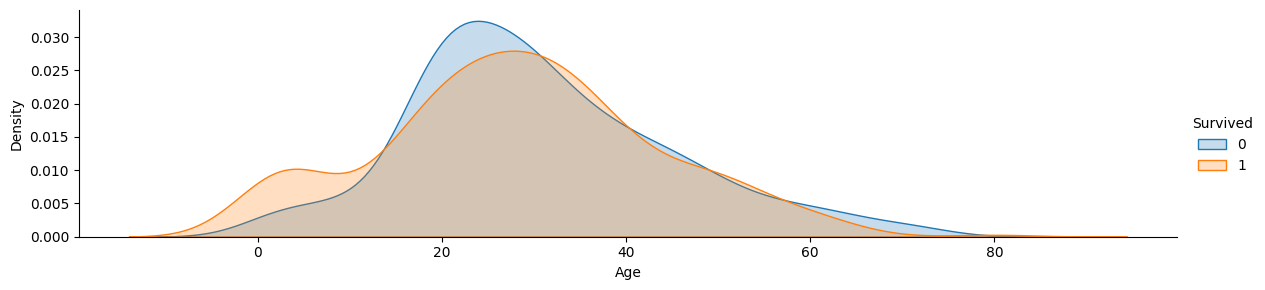

In [ ]:
survived_prob = sns.FacetGrid(train, hue = 'Survived', aspect = 4)
survived_prob.map(sns.kdeplot,"Age",shade = True)
survived_prob.add_legend()
plt.show()

Visualisasi diatas menunjukkan bahwa penumpang yang selamat kebanyakan berumur 0 - 17 tahun.

# Preprocessing Data

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Cek Missing Value

In [ ]:
# Cek missing value pada data train

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Cek missing value pada data test

test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Mengisi Missing Value Pada Data Train

Pada data train ada 3 fitur yang akan diisi missing value nya yaitu:


1.   Embarked
1.   Age
2.   Cabin




### Mengisi Missing Value Fitur Embarked

In [ ]:
# Melihat baris ke berapa yang missing value pada fitur embarked
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Dikarenakan fitur embarked bertipe data kategorikal atau object, maka dari itu data yang missing value akan diganti dengan nilai modus.

In [ ]:
# Melihat jumlah data masing masing kategorik pada fitur embarked

train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Nilai data "S" (Southampton) memiliki nilai paling banyak

In [ ]:
# Mengambil nilai modus pada fitur embarked
embarked_modus = train['Embarked'].mode()[0]
embarked_modus

'S'

In [ ]:
# Mengisi missing value pada fitur embarked dengan nilai modusnya

train['Embarked'] = train['Embarked'].fillna(embarked_modus)

In [ ]:
# Mengecek kembali apakah missing value sudah terisi atau belum

train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Mengisi Missing Value Fitur Age

Dikarenakan fitur Age bertipe data numerik, maka missing value akan diisi dengan nilai mean.

In [ ]:
# Mengambil nilai mean pada fitur Age

age_mean_train = train['Age'].mean()
age_mean_train

29.69911764705882

In [ ]:
# Mengisi missing value fitur Age dengan rata-rata nya
train['Age'] = train['Age'].fillna(age_mean_train)

# Mengecek kembali apakah missing value sdah terisi atau belum
train[train['Age'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Drop Fitur Cabin

Fitur Cabin tidak digunakan atau akan di drop dikarenakan missin value terlalu banyak sekitar sudah 30% lebih dari jumlah data

In [ ]:
train = train.drop(['Cabin'],axis = 1)

### Cek Kembali Missing Value Pada Data Train

In [ ]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Sudah tidak ada lagi missing value pada data train

## Mengisi Missing Value Pada Data Test

Pada data test ada 3 fitur yang akan diisi missing value nya yaitu:


1.   Age
1.   Fare
2.   Cabin


### Mengisi Missing Value Fitur Age

In [ ]:
# Mengambil nilai mean pada fitur Age

age_mean_test = test['Age'].mean()
age_mean_test

30.272590361445783

In [ ]:
# Mengisi missing value fitur Age dengan rata-rata nya
test['Age'] = test['Age'].fillna(age_mean_test)

# Mengecek kembali apakah missing value sudah terisi atau belum
test[test['Age'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Mengisi Missing Value Fitur Fare

In [ ]:
# Mengambil nilai mean pada fitur Fare

fare_mean_test = test['Fare'].mean()
fare_mean_test

# Mengisi missing value fitur Fare dengan rata-rata nya
test['Fare'] = test['Fare'].fillna(fare_mean_test)

# Mengecek kembali apakah missing value sudah terisi atau belum
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Drop Fitur Cabin

Fitur Cabin tidak digunakan atau akan di drop dikarenakan missin value terlalu banyak.

In [ ]:
test = test.drop(['Cabin'],axis = 1)

### Cek Kembali Missing Value Pada Data Test

In [ ]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Sudah tidak ada lagi missing value pada data test

## Konversi Data ke Numerik


Ada tiga cara untuk konversi ke numeric yaitu:


1.   Binary Converting (Biasanya untuk mengubah ke true or false)
1.   Ordinary Converting (Biasanya untuk mengubah object yang berbentuk tingkatan)
2.   One Hot Encoding




### Konversi Fitur Sex ke Numerik (Binary Converting)

In [ ]:
mapping_sex = {"male":1, "female":0}

# Merubah fitur sex ke numerik pada data train
train["Sex"] = train['Sex'].map(mapping_sex)

# Merubah fitur sex ke numerik pada data test
test["Sex"] = test['Sex'].map(mapping_sex)

### Konversi Fitur Embarked ke Numerik (One Hot Encoding)

In [ ]:
embarked_train = train[['Embarked']]
dummies_train = pd.get_dummies(embarked_train)

dummies_train.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
train = pd.merge(train.reset_index(), dummies_train.reset_index())

train.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,0,0,1
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,0,0,1
4,4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,0,0,1


In [ ]:
train = train.drop(['index', 'Embarked'], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1


In [ ]:
embarked_test = test[['Embarked']]
dummies_test = pd.get_dummies(embarked_test)

dummies_test.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [ ]:
test = pd.merge(test.reset_index(), dummies_test.reset_index())

test.head()

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q,0,1,0
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S,0,0,1
2,2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q,0,1,0
3,3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S,0,0,1
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S,0,0,1


In [ ]:
test = test.drop(['index', 'Embarked'], axis = 1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,1,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,0,1


## Extract Data Title dari Nama dan Konversi Tittlenya

### Data Train

In [ ]:
train['Title'] = train['Name'].str.extract("([A-Za-z]+)\.", expand = False)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1,Mr


In [ ]:
title_mapping_train = {"Mr":0,"Miss":1,"Mrs":2,
                       "Master":3,"Dr":3,"Rev":3,"Col":3,"Major":3,"Mlle":3,"Countess":3,
                       "Ms":3,"Lady":3,"Jonkheer":3,"Don":3,"Dona":3,"Mme":3,"Capt":3,"Sir":3}

train["Title"] = train['Title'].map(title_mapping_train)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1,0


### Data Test

In [ ]:
test['Title'] = test['Name'].str.extract("([A-Za-z]+)\.", expand = False)

test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,1,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,0,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,1,0,Mr
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,0,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,0,1,Mrs


In [ ]:
title_mapping_test = {"Mr":0,"Miss":1,"Mrs":2,
                       "Master":3,"Dr":3,"Rev":3,"Col":3,"Major":3,"Mlle":3,"Countess":3,
                       "Ms":3,"Lady":3,"Jonkheer":3,"Don":3,"Dona":3,"Mme":3,"Capt":3,"Sir":3}

test["Title"] = test['Title'].map(title_mapping_test)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,0,1,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,1,0,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,0,1,2


## Seleksi Fitur yang Digunakan

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,0,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,0,1,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,0,1,0


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,0,0,1,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,0,1,0,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,0,0,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,0,0,1,2


In [ ]:
print(train.shape)
print(test.shape)

(891, 14)
(418, 13)


In [ ]:
train = train.drop(["PassengerId","Name","Ticket"], axis = 1)

test_id = test[['PassengerId']] # disimpan untuk digunakan prediksi nantinya

test = test.drop(["PassengerId","Name","Ticket"], axis = 1)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,0,3,1,22.0,1,0,7.2500,0,0,1,0
1,1,1,0,38.0,1,0,71.2833,1,0,0,2
2,1,3,0,26.0,0,0,7.9250,0,0,1,1
3,1,1,0,35.0,1,0,53.1000,0,0,1,2
4,0,3,1,35.0,0,0,8.0500,0,0,1,0


In [ ]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title
0,3,1,34.5,0,0,7.8292,0,1,0,0
1,3,0,47.0,1,0,7.0000,0,0,1,2
2,2,1,62.0,0,0,9.6875,0,1,0,0
3,3,1,27.0,0,0,8.6625,0,0,1,0
4,3,0,22.0,1,1,12.2875,0,0,1,2


# Modelling

## Import Library Model Klasifikasi

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Memisahkan Fitur dan Target pada Data Train

In [ ]:
x_train = train.drop("Survived", axis = 1)
y_train = train['Survived']

## Naive Bayes

In [ ]:
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 0)

model_naive = GaussianNB()
scoring_naive = 'accuracy'
score_naive = cross_val_score(model_naive, x_train, y_train, cv = k_fold, n_jobs = 1, scoring = scoring_naive)
print(score_naive)

[0.78212291 0.78651685 0.78089888 0.8258427  0.82022472]


In [ ]:
score_naive.mean()

0.7991212102190698

## Decision Tree

In [ ]:
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 0)

model_decision = DecisionTreeClassifier()
scoring_decision = 'accuracy'
score_decision = cross_val_score(model_decision, x_train, y_train, cv = k_fold, n_jobs = 1, scoring = scoring_decision)
print(score_decision)

[0.73184358 0.78089888 0.78089888 0.76404494 0.78089888]


In [ ]:
score_decision.mean()

0.7677170296905405

## Prediction

Dikarenakan ketika menggunakan model Naive Bayes nilai yang didapatkan lebih baik dibandingkan Decision Tree, maka dari itu pada kasus ini kita akan menggunakan Naive Bayes untuk prediksi.

In [ ]:
model = GaussianNB()
model.fit(x_train,y_train)

GaussianNB()

In [ ]:
prediksi = model.predict(test)

In [ ]:
# Mengimport kembali data test untuk diambli fitur PassengerId
data_test = pd.read_csv("test.csv")

df = pd.DataFrame({
    "PassengerId": data_test["PassengerId"],
    "Survived": prediksi
})

df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
 # Mengubah DataFrame ke CSV untuk submission ke Kaggle

df.to_csv("submit.csv",index = False)

In [ ]:
# Menggabungkan kembali hasil prediksi ke data test

test['Survived Prediksi'] = df['Survived']
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Title,Survived,Survived Prediksi
0,3,1,34.5,0,0,7.8292,0,1,0,0,0,0
1,3,0,47.0,1,0,7.0000,0,0,1,2,1,1
2,2,1,62.0,0,0,9.6875,0,1,0,0,0,0
3,3,1,27.0,0,0,8.6625,0,0,1,0,0,0
4,3,0,22.0,1,1,12.2875,0,0,1,2,1,1
